In [1]:
import pandas as pd

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [20]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [21]:
survived = train_data['Survived']

In [22]:
train_data.drop('PassengerId',axis=1,inplace=True)
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
import numpy as np
import matplotlib.pyplot as plt

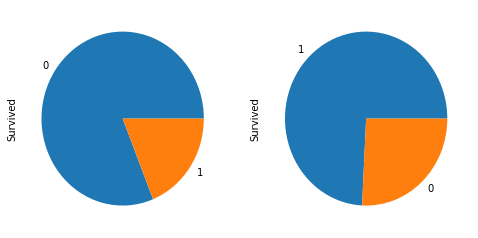

In [26]:
fig = plt.figure(figsize=(8,4))
fig.add_subplot(121)
train_data.Survived[train_data['Sex']=='male'].value_counts().plot(kind='pie')
fig.add_subplot(122)
train_data.Survived[train_data['Sex']=='female'].value_counts().plot(kind='pie')

In [27]:
from sklearn.preprocessing import LabelEncoder
train_data['Sex'] = LabelEncoder().fit_transform(train_data['Sex'])

In [29]:
train_data['Name'] = train_data['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
titles = train_data['Name'].unique()
titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [30]:
train_data['Age'].fillna(-1, inplace=True)

medians = dict()
for title in titles:
    median = train_data.Age[(train_data["Age"] != -1) & (train_data['Name'] == title)].median()
    medians[title] = median
    
for index, row in train_data.iterrows():
    if row['Age'] == -1:
        train_data.loc[index, 'Age'] = medians[row['Name']]

train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,S
4,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,S


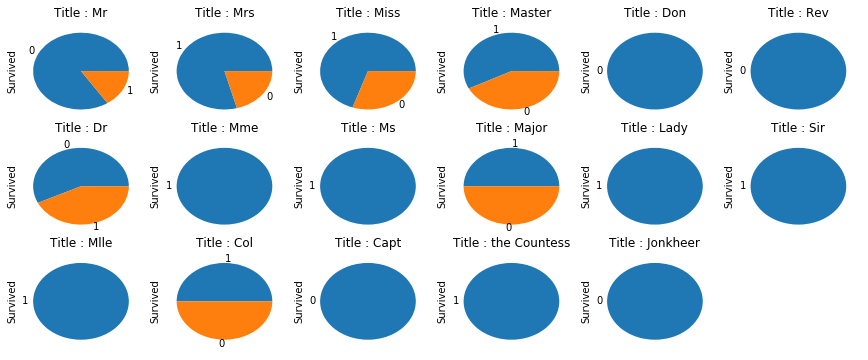

In [31]:
fig = plt.figure(figsize=(15,6))

i=1
for title in train_data['Name'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('Title : {}'.format(title))
    train_data.Survived[train_data['Name'] == title].value_counts().plot(kind='pie')
    i += 1


In [33]:
replacement = {
    'Don': 0,
    'Rev': 0,
    'Jonkheer': 0,
    'Capt': 0,
    'Mr': 1,
    'Dr': 2,
    'Col': 3,
    'Major': 3,
    'Master': 4,
    'Miss': 5,
    'Mrs': 6,
    'Mme': 7,
    'Ms': 7,
    'Mlle': 7,
    'Sir': 7,
    'Lady': 7,
    'the Countess': 7
}
train_data['Name'] = train_data['Name'].apply(lambda x: replacement.get(x))

from sklearn.preprocessing import StandardScaler
train_data['Name'] = StandardScaler().fit_transform(train_data['Name'].values.reshape(-1, 1))

/home/kullu/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [34]:
train_data.head()[['Pclass', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']]

,Pclass,Age,SibSp,Parch,Ticket,Cabin,Embarked
0,3,22.0,1,0,A/5 21171,NaN,S
1,1,38.0,1,0,PC 17599,C85,C
2,3,26.0,0,0,STON/O2. 3101282,NaN,S
3,1,35.0,1,0,113803,C123,S
4,3,35.0,0,0,373450,NaN,S


In [35]:
train_data['Age'] = StandardScaler().fit_transform(train_data['Age'].values.reshape(-1, 1))

In [36]:
train_data['Fare'].fillna(-1, inplace=True)
medians = dict()
for pclass in train_data['Pclass'].unique():
    median = train_data.Fare[(train_data["Fare"] != -1) & (train_data['Pclass'] == pclass)].median()
    medians[pclass] = median
for index, row in train_data.iterrows():
    if row['Fare'] == -1:
        train_data.loc[index, 'Fare'] = medians[row['Pclass']]
train_data['Fare'] = StandardScaler().fit_transform(train_data['Fare'].values.reshape(-1, 1))

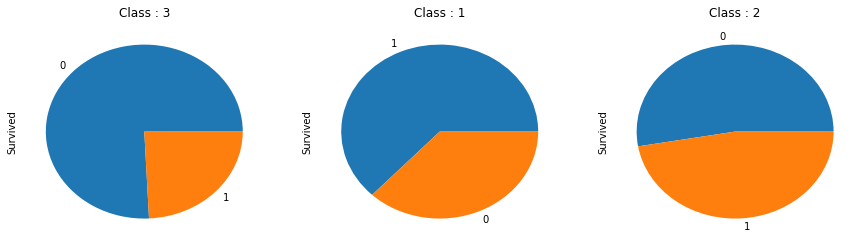

In [37]:
fig = plt.figure(figsize=(15,4))

i=1
for pclass in train_data['Pclass'].unique():
    fig.add_subplot(1, 3, i)
    plt.title('Class : {}'.format(pclass))
    train_data.Survived[train_data['Pclass'] == pclass].value_counts().plot(kind='pie')
    i += 1

In [38]:
train_data['Pclass'] = StandardScaler().fit_transform(train_data['Pclass'].values.reshape(-1, 1))

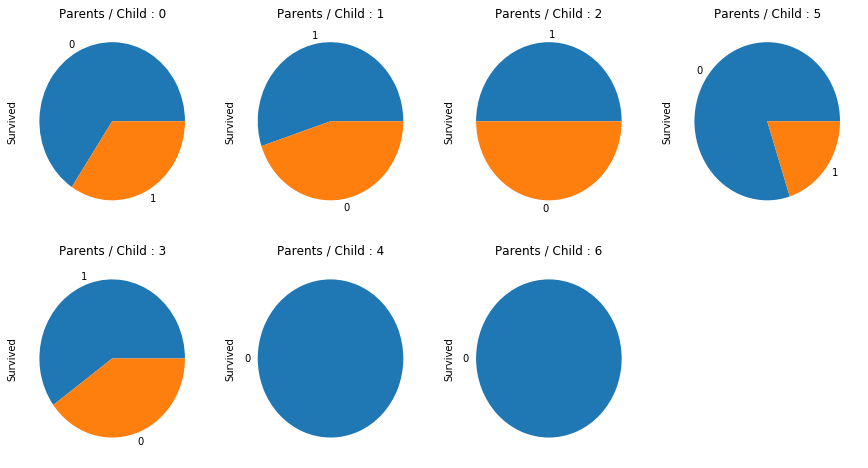

In [39]:
fig = plt.figure(figsize=(15,8))
i = 0
for parch in train_data['Parch'].unique():
    fig.add_subplot(2, 4, i+1)
    plt.title('Parents / Child : {}'.format(parch))
    train_data.Survived[train_data['Parch'] == parch].value_counts().plot(kind='pie')
    i += 1


In [40]:
replacement = {
    6: 0,
    4: 0,
    5: 1,
    0: 2,
    2: 3,
    1: 4,
    3: 5
}
train_data['Parch'] = train_data['Parch'].apply(lambda x: replacement.get(x))
train_data['Parch'] = StandardScaler().fit_transform(train_data['Parch'].values.reshape(-1, 1))

In [41]:
train_data.drop('Ticket', axis=1, inplace=True)

In [42]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

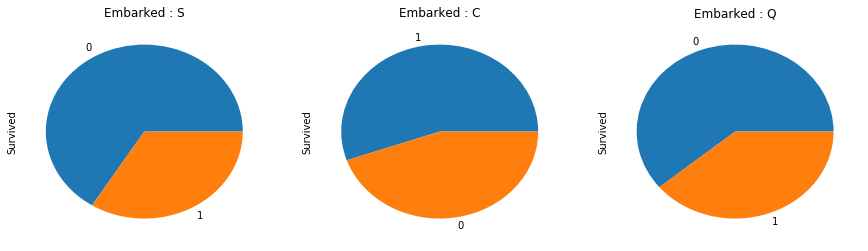

In [43]:
train_data['Embarked'].fillna('S', inplace=True)
fig = plt.figure(figsize=(15,4))
i = 1
for embarked in train_data['Embarked'].unique():
    fig.add_subplot(1, 3, i)
    plt.title('Embarked : {}'.format(embarked))
    train_data.Survived[train_data['Embarked'] == embarked].value_counts().plot(kind='pie')
    i += 1


In [44]:
replacement = {
    'S': 0,
    'Q': 1,
    'C': 2
}

train_data['Embarked'] = train_data['Embarked'].apply(lambda x: replacement.get(x))
train_data['Embarked'] = StandardScaler().fit_transform(train_data['Embarked'].values.reshape(-1, 1))
train_data.head()['Embarked']

0   -0.585954
1    1.942303
2   -0.585954
3   -0.585954
4   -0.585954
Name: Embarked, dtype: float64

In [45]:
train_data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

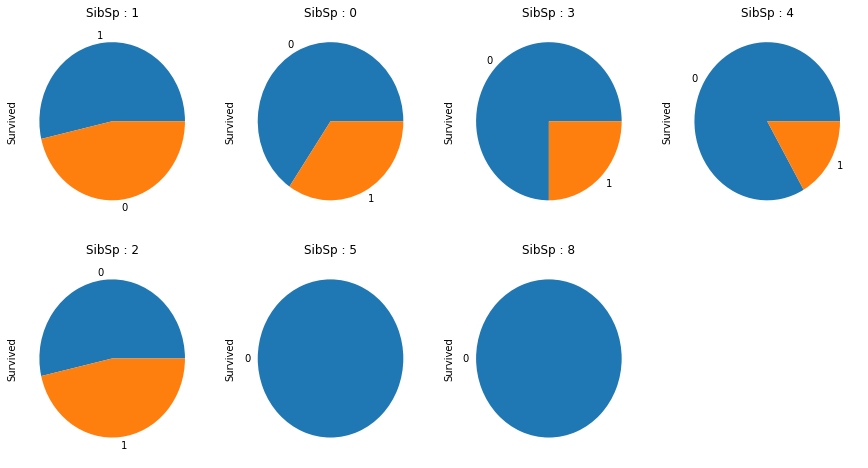

In [46]:
fig = plt.figure(figsize=(15,8))
i = 1
for sibsp in train_data['SibSp'].unique():
    fig.add_subplot(2, 4, i)
    plt.title('SibSp : {}'.format(sibsp))
    train_data.Survived[train_data['SibSp'] == sibsp].value_counts().plot(kind='pie')
    i += 1

In [47]:
replacement = {
    5: 0,
    8: 0,
    4: 1,
    3: 2,
    0: 3,
    2: 4,
    1: 5
}

train_data['SibSp'] = train_data['SibSp'].apply(lambda x: replacement.get(x))
train_data['SibSp'] = StandardScaler().fit_transform(train_data['SibSp'].values.reshape(-1, 1))
train_data.head()['SibSp']


0    1.576109
1    1.576109
2   -0.396241
3    1.576109
4   -0.396241
Name: SibSp, dtype: float64

In [48]:
train_data['Cabin'].fillna('U', inplace=True)
train_data['Cabin'] = train_data['Cabin'].apply(lambda x: x[0])
train_data['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

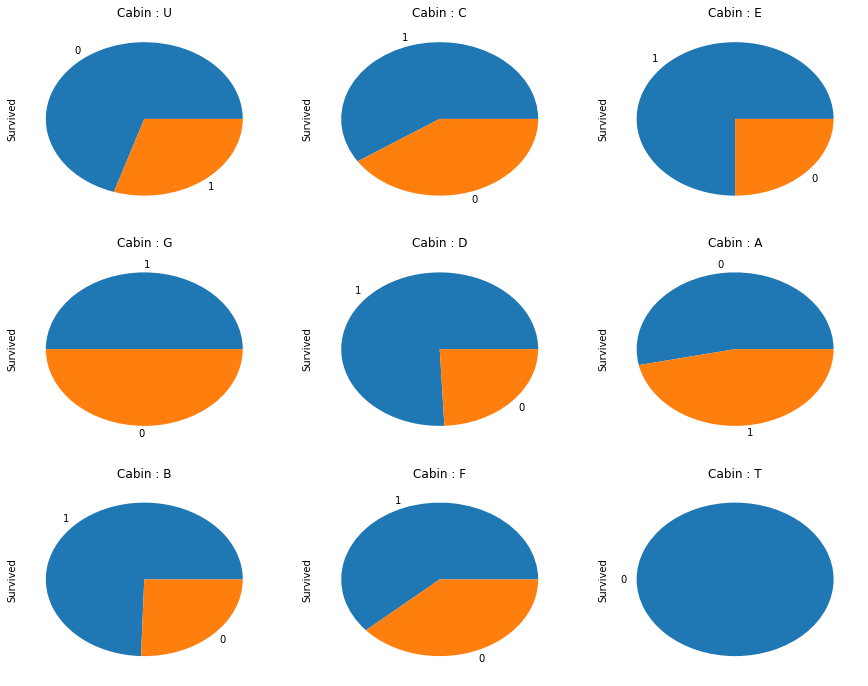

In [49]:
fig = plt.figure(figsize=(15,12))
i = 1
for cabin in train_data['Cabin'].unique():
    fig.add_subplot(3, 3, i)
    plt.title('Cabin : {}'.format(cabin))
    train_data.Survived[train_data['Cabin'] == cabin].value_counts().plot(kind='pie')
    i += 1

In [50]:
replacement = {
    'T': 0,
    'U': 1,
    'A': 2,
    'G': 3,
    'C': 4,
    'F': 5,
    'B': 6,
    'E': 7,
    'D': 8
}
train_data['Cabin'] = train_data['Cabin'].apply(lambda x: replacement.get(x))
train_data['Cabin'] = StandardScaler().fit_transform(train_data['Cabin'].values.reshape(-1, 1))
train_data.head()['Cabin']

0   -0.494813
1    0.960231
2   -0.494813
3    0.960231
4   -0.494813
Name: Cabin, dtype: float64

In [51]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,0.827377,-0.797294,1,-0.557420,1.576109,-0.468807,-0.502445,-0.494813,-0.585954
1,1,-1.566107,1.537975,0,0.649410,1.576109,-0.468807,0.786845,0.960231,1.942303
2,1,0.827377,1.070922,0,-0.255712,-0.396241,-0.468807,-0.488854,-0.494813,-0.585954
3,1,-1.566107,1.537975,0,0.423129,1.576109,-0.468807,0.420730,0.960231,-0.585954
4,0,0.827377,-0.797294,1,0.423129,-0.396241,-0.468807,-0.486337,-0.494813,-0.585954


In [52]:
from sklearn.model_selection import train_test_split
survived = train_data['Survived']
train_data.drop('Survived', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(train_data, survived, test_size=0.2, random_state=42)

In [53]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

models = [
    RandomForestClassifier(n_estimators=100),
    MLPClassifier(),
]

for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(score)

0.8324022346368715
0.8044692737430168


/home/kullu/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
